# 19/febrero/2021 - Contexto de la problemática a resolver 
---

Del data set del “Titanic” tomar el “train.csv” para analizar la distribución de todas
las features y responder:
* ¿Cuáles variables tienen valores únicos y no sirven en un clasificador? (ejemplo número de boleto)

In [1]:
import pandas as pd

df_train = pd.read_csv("../data/titanic/train.csv")

display(df_train.head())
display(df_train.tail())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


* ¿Cuáles variables son categóricas y cuáles numéricas?

In [2]:
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

* Graficar las dos variables con mayor varianza.

In [3]:
columns_names = list(df_train.columns)

In [4]:
columns_var = df_train.var()

list_columns_var = []

for name in columns_names:
    try:
        list_columns_var.append((name, columns_var[name]))
    except:
        continue

list_columns_var.sort(key= lambda x: x[1])

columns_hvariance = list_columns_var[-2:]
columns_mvariance = list_columns_var[:2]
display(columns_hvariance) 
display(columns_mvariance) 

[('Fare', 2469.436845743116), ('PassengerId', 66231.0)]

[('Survived', 0.23677221654749742), ('Parch', 0.6497282437357343)]

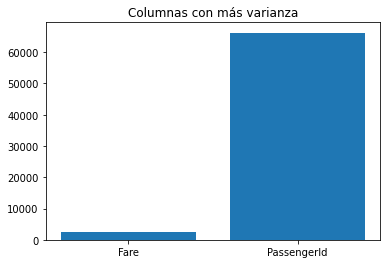

In [5]:
import matplotlib.pyplot as plt

x = []
y = []

for colum in columns_hvariance:
    x.append(colum[0])
    y.append(colum[1])

plt.bar(x,y)
plt.title("Columnas con más varianza")
plt.show()

* Graficar las dos variables con la menor varianza.

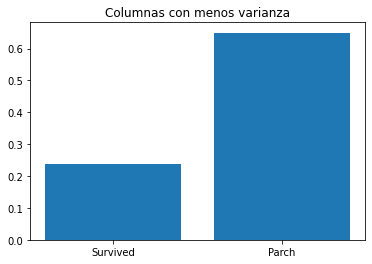

In [6]:
import matplotlib.pyplot as plt

x = []
y = []

for colum in columns_mvariance:
    x.append(colum[0])
    y.append(colum[1])

plt.bar(x,y)
plt.title("Columnas con menos varianza")
plt.show()

* Intuitivamente sabemos que la preferencia la tenían mujeres, entonces ¿la mayoría de sobrevivientes fueron mujeres?

In [7]:
sex_group = df_train.groupby(["Sex"])
sex_group.sum()["Survived"]

Sex
female    233
male      109
Name: Survived, dtype: int64

* ¿La distribución entre hombres y mujeres que varianza tiene?

In [8]:
sex_colum = df_train["Sex"]

sex_list = []

for i in range(len(sex_colum)):
    sex = sex_colum.iat[i]
    if sex=="male":
        sex_list.append(0)
    else:
        sex_list.append(1)
    sex_colum.iat[i] = sex

sex_series = pd.Series(sex_list)
sex_var = sex_series.var()

print(f"La distribución entre hombres y mujeres tiene una varianza de {sex_var}")

La distribución entre hombres y mujeres tiene una varianza de 0.22847450787525697


* ¿En general las variables son mejores con mucha varianza o poca?

Depende que es lo que estes buscando ya que cuando la varianza esta baja los valores estan mas cerca a la media pero cuando la varianza es alta estos estan muy separados de esta. De igual manera los valores atipicos pueden incrementar el valor de la varianza.

* ¿Si normalizamos los datos, las variables como varianza se ven afectadas?

In [9]:
def mean_normalization(l: list):
    l_series = pd.Series(l)
    l_std = l_series.std()
    l_mean = l_series.mean()
    return [x-l_mean for x in l] / l_std

x = [1,23,3134,486,57,62,73,97,104]
""" print(f"x:\n\t{x}") """
x_series = pd.Series(x)
print(f"Varianza variable x: {x_series.var()}")
x_norm = mean_normalization(x)
""" print(f"x normalizada:\n\t{x_norm}") """
print(f"Varianza variable x: {x_norm.var()}")

Varianza variable x: 1035063.7777777778
Varianza variable x: 0.8888888888888891


La varianza se ve afectada debido a que el rango de los valores se reduce de manera proporcional, por esto la varianza se vera reducida.

* Obtenga el Sampling distribution de las variables que considere importantes.

In [10]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
import numpy as np

def random_sample(low_limit: int, high_limit: int, size: int):
    diff = 0
    sample_indexes = []
    while size != diff:
        sample_indexes = list(np.random.randint(low_limit, high_limit, size=2))
        sample_indexes.sort()
        diff = sample_indexes[1] - sample_indexes[0]
    return sample_indexes


r, c = df_train.shape

def sample_stats():
    i0, i1 = random_sample(0, r, 10)
    sample = df_train.iloc[i0:i1]
    display(sample.describe())

In [12]:
sample_stats()
sample_stats()
sample_stats()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,10.00000,10.000000,10.000000,8.000000,10.000000,10.000000,10.000000
mean,840.50000,0.400000,2.300000,26.187500,0.100000,0.100000,25.059160
std,3.02765,0.516398,0.948683,8.742088,0.316228,0.316228,26.034018
min,836.00000,0.000000,1.000000,16.000000,0.000000,0.000000,6.437500
25%,838.25000,0.000000,1.250000,19.250000,0.000000,0.000000,8.203125
50%,840.50000,0.000000,3.000000,25.500000,0.000000,0.000000,9.581250
75%,842.75000,1.000000,3.000000,32.625000,0.000000,0.000000,30.675000
max,845.00000,1.000000,3.000000,39.000000,1.000000,1.000000,83.158300


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,10.00000,10.000000,10.000000,8.000000,10.000000,10.000000,10.000000
mean,586.50000,0.300000,2.000000,38.875000,0.200000,0.400000,38.279580
std,3.02765,0.483046,0.942809,14.564512,0.421637,0.699206,38.043689
min,582.00000,0.000000,1.000000,18.000000,0.000000,0.000000,7.125000
25%,584.25000,0.000000,1.000000,31.750000,0.000000,0.000000,8.215625
50%,586.50000,0.000000,2.000000,37.500000,0.000000,0.000000,20.500000
75%,588.75000,0.750000,3.000000,48.750000,0.000000,0.750000,69.431250
max,591.00000,1.000000,3.000000,60.000000,1.000000,2.000000,110.883300


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,10.00000,10.000000,10.000000,7.000000,10.000000,10.000000,10.000000
mean,407.50000,0.100000,2.800000,25.428571,0.700000,0.200000,12.983330
std,3.02765,0.316228,0.421637,14.751917,0.948683,0.421637,6.734091
min,403.00000,0.000000,2.000000,3.000000,0.000000,0.000000,6.858300
25%,405.25000,0.000000,3.000000,20.500000,0.000000,0.000000,7.805200
50%,407.50000,0.000000,3.000000,21.000000,0.500000,0.000000,9.243750
75%,409.75000,0.000000,3.000000,31.000000,1.000000,0.000000,18.025000
max,412.00000,1.000000,3.000000,51.000000,3.000000,1.000000,25.466700
